In [1]:
import pandas as pd
import nltk

In [2]:
cd "C:\Users\Elizabeth's\Documents\Folger_Digital_Texts_Complete"

C:\Users\Elizabeth's\Documents\Folger_Digital_Texts_Complete


In [3]:
richardIII= pd.read_csv("richardIII_gender.csv")
richardIII[185:200]

,title,act_scene,folgerID,speaker,sex,prose_verse,lines
185,Richard III,1.1.108,Clarence_3H6,CLARENCE,male,verse,"We know thy charge, Brakenbury, and will obey."
186,Richard III,1.1.109,RichardIII_R3,RICHARD,male,verse,We are the Queen’s abjects and must obey.—
187,Richard III,1.1.110,RichardIII_R3,RICHARD,male,verse,"Brother, farewell. I will unto the King,"
188,Richard III,1.1.111,RichardIII_R3,RICHARD,male,verse,"And whatsoe’er you will employ me in,"
189,Richard III,1.1.112,RichardIII_R3,RICHARD,male,verse,"Were it to call King Edward’s widow sister,"
190,Richard III,1.1.113,RichardIII_R3,RICHARD,male,verse,I will perform it to enfranchise you.
191,Richard III,1.1.114,RichardIII_R3,RICHARD,male,verse,"Meantime, this deep disgrace in brotherhood"
192,Richard III,1.1.115,RichardIII_R3,RICHARD,male,verse,Touches me deeper than you can imagine.
193,Richard III,1.1.116,Clarence_3H6,CLARENCE,male,verse,I know it pleaseth neither of us well.
194,Richard III,1.1.117,RichardIII_R3,RICHARD,male,verse,"Well, your imprisonment shall not be long."


In [4]:
richardIII = richardIII.drop(columns = ['title', 'folgerID', 'act_scene',  'prose_verse'])
richardIII

,speaker,sex,lines
0,Sex,Sex,NaN
1,male,male,NaN
2,female,female,NaN
3,male,male,NaN
4,female,female,NaN
...,...,...,...
4485,RICHMOND,male,And make poor England weep in streams of blood.
4486,RICHMOND,male,"Let them not live to taste this land’s increase,"
4487,RICHMOND,male,That would with treason wound this fair land’s...
4488,RICHMOND,male,"Now civil wounds are stopped, peace lives again."


In [5]:
richardIII.dropna(axis=0, inplace=True)
richardIII

,speaker,sex,lines
77,RICHARD,male,Now is the winter of our discontent
78,RICHARD,male,"Made glorious summer by this son of York,"
79,RICHARD,male,And all the clouds that loured upon our house
80,RICHARD,male,In the deep bosom of the ocean buried.
81,RICHARD,male,"Now are our brows bound with victorious wreaths,"
...,...,...,...
4485,RICHMOND,male,And make poor England weep in streams of blood.
4486,RICHMOND,male,"Let them not live to taste this land’s increase,"
4487,RICHMOND,male,That would with treason wound this fair land’s...
4488,RICHMOND,male,"Now civil wounds are stopped, peace lives again."


In [6]:
# Load the regular expression library
import re

# Remove punctuation
richardIII['text_processed'] = \
richardIII['lines'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
richardIII['text_processed'] = \
richardIII['text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
richardIII['text_processed'].head()

77                now is the winter of our discontent
78           made glorious summer by this son of york
79      and all the clouds that loured upon our house
80              in the deep bosom of the ocean buried
81    now are our brows bound with victorious wreaths
Name: text_processed, dtype: object

### custom stop words list, includes common Shakespearean words: thee, thine, thou, etc.

In [7]:
filename = "custom_stops.txt"
file = open(filename, mode= 'r')
stop_words = file.read()

In [8]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

## new dataframe
data = richardIII.text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['now', 'winter', 'discontent']


In [9]:
# remove stop words, add new column
richardIII['data_words'] = remove_stopwords(richardIII.text_processed.values.tolist())

print(richardIII.data_words)
richardIII

77                        [now, winter, discontent]
78              [made, glorious, summer, son, york]
79                    [clouds, loured, upon, house]
80                     [deep, bosom, ocean, buried]
81         [now, brows, bound, victorious, wreaths]
                           ...                     
4485    [make, poor, england, weep, streams, blood]
4486             [let, live, taste, land, increase]
4487            [treason, wound, fair, land, peace]
4488    [now, civil, wounds, stopped, peace, lives]
4489              [may, long, live, god, say, amen]
Name: data_words, Length: 3765, dtype: object


,speaker,sex,lines,text_processed,data_words
77,RICHARD,male,Now is the winter of our discontent,now is the winter of our discontent,"[now, winter, discontent]"
78,RICHARD,male,"Made glorious summer by this son of York,",made glorious summer by this son of york,"[made, glorious, summer, son, york]"
79,RICHARD,male,And all the clouds that loured upon our house,and all the clouds that loured upon our house,"[clouds, loured, upon, house]"
80,RICHARD,male,In the deep bosom of the ocean buried.,in the deep bosom of the ocean buried,"[deep, bosom, ocean, buried]"
81,RICHARD,male,"Now are our brows bound with victorious wreaths,",now are our brows bound with victorious wreaths,"[now, brows, bound, victorious, wreaths]"
...,...,...,...,...,...
4485,RICHMOND,male,And make poor England weep in streams of blood.,and make poor england weep in streams of blood,"[make, poor, england, weep, streams, blood]"
4486,RICHMOND,male,"Let them not live to taste this land’s increase,",let them not live to taste this land’s increase,"[let, live, taste, land, increase]"
4487,RICHMOND,male,That would with treason wound this fair land’s...,that would with treason wound this fair land’s...,"[treason, wound, fair, land, peace]"
4488,RICHMOND,male,"Now civil wounds are stopped, peace lives again.",now civil wounds are stopped peace lives again,"[now, civil, wounds, stopped, peace, lives]"


## explore corpus with word clouds

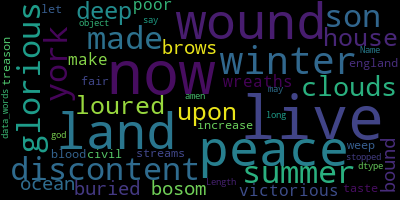

In [10]:
# Import the wordcloud library
from wordcloud import WordCloud

# Create a WordCloud object
text = str(richardIII['data_words'])
wordcloud = WordCloud( max_words=80, max_font_size = 60, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(text)

# Visualize the word cloud
wordcloud.to_image()

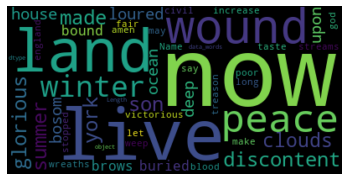

In [11]:
#for word cloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

## LDA modeling

In [12]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1)]


In [13]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"king" + 0.007*"unto" + 0.007*"may" + 0.007*"look" + 0.006*"god" + '
  '0.006*"good" + 0.006*"mother" + 0.006*"still" + 0.005*"true" + '
  '0.005*"happy"'),
 (1,
  '0.039*"lord" + 0.026*"good" + 0.015*"love" + 0.012*"come" + 0.010*"go" + '
  '0.007*"cousin" + 0.007*"noble" + 0.006*"fear" + 0.006*"bid" + '
  '0.005*"gracious"'),
 (2,
  '0.014*"upon" + 0.014*"now" + 0.010*"yet" + 0.007*"god" + 0.007*"grace" + '
  '0.006*"brother" + 0.006*"let" + 0.006*"doth" + 0.006*"edward" + '
  '0.006*"bloody"'),
 (3,
  '0.018*"god" + 0.017*"king" + 0.008*"prince" + 0.007*"heart" + 0.007*"hand" '
  '+ 0.007*"blood" + 0.006*"head" + 0.006*"now" + 0.006*"made" + '
  '0.006*"england"'),
 (4,
  '0.010*"lord" + 0.009*"god" + 0.007*"royal" + 0.007*"come" + 0.007*"mine" + '
  '0.005*"might" + 0.005*"man" + 0.005*"one" + 0.005*"heavy" + 0.005*"live"'),
 (5,
  '0.023*"lord" + 0.010*"die" + 0.009*"death" + 0.009*"may" + 0.008*"make" + '
  '0.008*"let" + 0.007*"good" + 0.006*"made" + 0.006*"go" + 0

In [14]:
# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"lord" + 0.011*"go" + 0.010*"good" + 0.008*"edward" + 0.007*"death" + '
  '0.006*"brother" + 0.006*"clarence" + 0.006*"king" + 0.005*"richard" + '
  '0.005*"god"'),
 (1,
  '0.015*"lord" + 0.008*"yet" + 0.008*"good" + 0.006*"god" + 0.006*"let" + '
  '0.006*"buckingham" + 0.006*"see" + 0.005*"grace" + 0.005*"edward" + '
  '0.005*"brother"'),
 (2,
  '0.012*"come" + 0.011*"say" + 0.011*"god" + 0.009*"good" + 0.008*"king" + '
  '0.008*"now" + 0.007*"mine" + 0.007*"lord" + 0.006*"man" + 0.006*"soul"'),
 (3,
  '0.010*"now" + 0.006*"gentle" + 0.006*"done" + 0.006*"heart" + 0.006*"take" '
  '+ 0.006*"upon" + 0.006*"son" + 0.005*"lord" + 0.005*"let" + 0.005*"god"'),
 (4,
  '0.016*"lord" + 0.009*"upon" + 0.009*"grace" + 0.008*"may" + 0.007*"good" + '
  '0.007*"know" + 0.006*"one" + 0.006*"time" + 0.005*"live" + 0.005*"king"')]


### using mallet-processed file for LDA

In [15]:
from gensim.test.utils import get_tmpfile, common_texts
from gensim.corpora import MalletCorpus
from gensim.corpora import Dictionary

# Prepare needed data
dictionary = Dictionary(data_words)
corpus = [dictionary.doc2bow(doc) for doc in data_words]

# Write corpus in Mallet format to disk
output_fname = get_tmpfile("corpus.mallet")
MalletCorpus.serialize(output_fname, corpus, dictionary)

# Read corpus
loaded_corpus = MalletCorpus(output_fname)

In [16]:
lda_model = gensim.models.LdaMulticore(corpus=loaded_corpus,
                                       id2word=dictionary,
                                       num_topics=5)

In [17]:
pprint(lda_model.print_topics())
doc_lda = lda_model[loaded_corpus]

[(0,
  '0.015*"embrace" + 0.009*"trembling" + 0.008*"images" + 0.006*"feeble" + '
  '0.006*"multitude" + 0.005*"sojourn" + 0.005*"encouragement" + '
  '0.005*"meaning" + 0.005*"play" + 0.005*"erpast"'),
 (1,
  '0.025*"images" + 0.014*"play" + 0.010*"swine" + 0.010*"warrant" + '
  '0.009*"prate" + 0.008*"sojourn" + 0.006*"feeble" + 0.006*"blessings" + '
  '0.006*"dread" + 0.005*"knee"'),
 (2,
  '0.012*"blessings" + 0.010*"writ" + 0.008*"precious" + 0.007*"multitude" + '
  '0.007*"revengeful" + 0.006*"warrant" + 0.006*"sole" + 0.006*"images" + '
  '0.006*"knee" + 0.005*"requires"'),
 (3,
  '0.008*"greatness" + 0.007*"images" + 0.007*"troops" + 0.007*"surmise" + '
  '0.007*"blindly" + 0.006*"meaning" + 0.006*"suborn" + 0.006*"warrant" + '
  '0.006*"embrace" + 0.005*"innocents"'),
 (4,
  '0.015*"images" + 0.008*"sojourn" + 0.008*"warrant" + 0.007*"writ" + '
  '0.006*"level" + 0.006*"knee" + 0.006*"privilege" + 0.006*"gave" + '
  '0.005*"kissing" + 0.004*"precious"')]


In [18]:
lda_model = gensim.models.LdaMulticore(corpus=loaded_corpus,
                                       id2word=dictionary,
                                       num_topics=10)

In [19]:
pprint(lda_model.print_topics())
doc_lda = lda_model[loaded_corpus]

[(0,
  '0.024*"images" + 0.012*"embrace" + 0.009*"troops" + 0.008*"requires" + '
  '0.007*"write" + 0.006*"sojourn" + 0.006*"thriving" + 0.005*"vaughan" + '
  '0.005*"doting" + 0.005*"fie"'),
 (1,
  '0.012*"sojourn" + 0.010*"knee" + 0.010*"multitude" + 0.009*"warrant" + '
  '0.009*"meaning" + 0.008*"feeble" + 0.007*"swine" + 0.006*"vaughan" + '
  '0.006*"gave" + 0.006*"poor"'),
 (2,
  '0.023*"images" + 0.015*"greatness" + 0.014*"blessings" + 0.014*"writ" + '
  '0.008*"sojourn" + 0.007*"feeble" + 0.007*"play" + 0.006*"warrant" + '
  '0.005*"unrespective" + 0.005*"sweating"'),
 (3,
  '0.008*"clergymen" + 0.008*"precious" + 0.006*"offense" + 0.006*"doting" + '
  '0.006*"meaning" + 0.006*"worldly" + 0.006*"babes" + 0.006*"privilege" + '
  '0.006*"embrace" + 0.005*"nights"'),
 (4,
  '0.022*"images" + 0.016*"warrant" + 0.010*"surmise" + 0.009*"worldly" + '
  '0.008*"sojourn" + 0.007*"play" + 0.007*"envious" + 0.007*"tackling" + '
  '0.005*"kissing" + 0.005*"aweless"'),
 (5,
  '0.014*"images"

In [20]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
from gensim.models.phrases import Phraser

In [21]:
# Building the bigram and trigram models using Gensim  
bigram = Phrases(data_words) # higher threshold represents fewer phrases.
trigram = Phrases(bigram[data_words], threshold=100) 

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

In [23]:
print(bigram_mod[data_words[5]])

['bruised', 'arms', 'hung', 'monuments']


In [24]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [25]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [26]:
import spacy

In [28]:
# Initialize spacy 'en' model
nlp = spacy.load("en_core_web_sm")
               

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(bigram_mod[data_words], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

[['now', 'winter', 'discontent'], ['make', 'glorious', 'summer']]


In [29]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency. "id2word" matches words with their IDs in the corpus
# "doc2bow" converts the corpus into a bag of words 
corpus = [id2word.doc2bow(text) for text in texts]

# View frequency tuples: first index is the word and second is the frequency for that word
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [30]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('discontent', 1), ('now', 1), ('winter', 1)]]

In [31]:
# Build LDA model
# Avoiding future changes warning messages
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# Parametize the model
# See details for parameters values: https://radimrehurek.com/gensim/models/ldamodel.html
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,                                  
                                           chunksize=100,
                                           passes=100,
                                           alpha='auto',
                                           per_word_topics=True)

In [32]:
# Print keyword for the topics created 
# the number besides the topic shows the probability score for that topic within the cluster
from pprint import pprint

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.044*"good" + 0.027*"day" + 0.022*"horse" + 0.021*"time" + 0.020*"give" + '
  '0.015*"fight" + 0.015*"long" + 0.014*"lord" + 0.014*"tomorrow" + '
  '0.012*"peace"'),
 (1,
  '0.035*"make" + 0.021*"fair" + 0.020*"live" + 0.019*"friend" + 0.016*"heart" '
  '+ 0.016*"die" + 0.015*"blood" + 0.013*"dead" + 0.013*"dream" + 0.013*"son"'),
 (2,
  '0.033*"love" + 0.025*"man" + 0.023*"king" + 0.016*"daughter" + 0.016*"know" '
  '+ 0.014*"speak" + 0.013*"hour" + 0.013*"poor" + 0.012*"name" + '
  '0.010*"word"'),
 (3,
  '0.029*"let" + 0.025*"go" + 0.024*"soul" + 0.021*"tell" + 0.020*"think" + '
  '0.018*"death" + 0.015*"life" + 0.015*"mother" + 0.014*"child" + '
  '0.014*"see"'),
 (4,
  '0.037*"come" + 0.036*"say" + 0.032*"now" + 0.018*"arm" + 0.018*"bloody" + '
  '0.017*"grace" + 0.016*"sleep" + 0.015*"look" + 0.015*"brother" + '
  '0.011*"land"')]


In [33]:
from __future__ import division

# Visualize the topics using pyLDAvis
# Save the visualization as an html file
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word,  mds='mmds')
pyLDAvis.display(vis, template_type='notebook') 
vis

pyLDAvis.save_html(vis,'LDA_viz_RIII.html')


C:\Users\Elizabeth's\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


top_topics(corpus=None, texts=None, dictionary=None, window_size=None, coherence='u_mass', topn=20, processes=-1)

In [34]:
pprint(lda_model.top_topics(corpus=corpus,  topn=10))

[([(0.029471172, 'let'),
   (0.02527278, 'go'),
   (0.024474733, 'soul'),
   (0.0209161, 'tell'),
   (0.019904317, 'think'),
   (0.017960913, 'death'),
   (0.01502646, 'life'),
   (0.014794793, 'mother'),
   (0.013804542, 'child'),
   (0.013712896, 'see')],
  -11.183063235606348),
 ([(0.033414718, 'love'),
   (0.025047177, 'man'),
   (0.022812603, 'king'),
   (0.016424283, 'daughter'),
   (0.015831133, 'know'),
   (0.013954836, 'speak'),
   (0.012892078, 'hour'),
   (0.012836204, 'poor'),
   (0.012127333, 'name'),
   (0.009749295, 'word')],
  -15.444100969578411),
 ([(0.04396866, 'good'),
   (0.027499804, 'day'),
   (0.021857219, 'horse'),
   (0.02133265, 'time'),
   (0.020479422, 'give'),
   (0.015439325, 'fight'),
   (0.014936652, 'long'),
   (0.014226654, 'lord'),
   (0.013930099, 'tomorrow'),
   (0.01165851, 'peace')],
  -15.58069340570941),
 ([(0.037041117, 'come'),
   (0.03571092, 'say'),
   (0.03196164, 'now'),
   (0.018078523, 'arm'),
   (0.017724704, 'bloody'),
   (0.017394587

## LDA topic modeling by character

In [35]:
just_richard = richardIII.loc[richardIII['speaker'] == " RICHARD", "data_words"]
just_richard

77                     [now, winter, discontent]
78           [made, glorious, summer, son, york]
79                 [clouds, loured, upon, house]
80                  [deep, bosom, ocean, buried]
81      [now, brows, bound, victorious, wreaths]
                          ...                   
4427              [slave, set, life, upon, cast]
4428                        [stand, hazard, die]
4429              [think, six, richmonds, field]
4430               [five, slain, today, instead]
4431              [horse, horse, kingdom, horse]
Name: data_words, Length: 1176, dtype: object

In [36]:
# Form Bigrams
richard_bigrams = make_bigrams(just_richard)

In [37]:
# Do lemmatization keeping only noun, adj, vb, adv
richard_lemmatized = lemmatization(richard_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(richard_lemmatized[:2])

[['now', 'winter', 'discontent'], ['make', 'glorious', 'summer']]


In [38]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(richard_lemmatized)

# Create Corpus
texts = richard_lemmatized

# Term Document Frequency. "id2word" matches words with their IDs in the corpus
corpus = [id2word.doc2bow(text) for text in texts]

# View frequency tuples: first index is the word and second is the frequency for that word
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [39]:
# Build LDA model

# Parametize the model
# See details for parameters values: https://radimrehurek.com/gensim/models/ldamodel.html
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,                                  
                                           chunksize=100,
                                           passes=100,
                                           alpha='auto',
                                           per_word_topics=True)

In [41]:
pprint(lda_model.top_topics(corpus=corpus,  topn=8))

[([(0.031888425, 'come'),
   (0.027571773, 'good'),
   (0.023459367, 'look'),
   (0.016063454, 'day'),
   (0.01444908, 'clarence'),
   (0.011988446, 'wife'),
   (0.011217095, 'gentleman'),
   (0.0108367475, 'hear')],
  -16.918169678505752),
 ([(0.024066627, 'make'),
   (0.022915259, 'now'),
   (0.022743331, 'horse'),
   (0.019937687, 'daughter'),
   (0.016710721, 'tell'),
   (0.016423581, 'give'),
   (0.014407139, 'think'),
   (0.014386691, 'bring')],
  -17.68633286311272),
 ([(0.031243563, 'love'),
   (0.023740858, 'let'),
   (0.015781637, 'soul'),
   (0.015458507, 'mother'),
   (0.013437009, 'fair'),
   (0.012432302, 'life'),
   (0.009250296, 'blood'),
   (0.0091815265, 'noble')],
  -18.94326909491837),
 ([(0.033993743, 'say'),
   (0.032295663, 'go'),
   (0.016456641, 'time'),
   (0.015217508, 'speak'),
   (0.014739705, 'friend'),
   (0.01469266, 'eye'),
   (0.01173484, 'great'),
   (0.01117149, 'word')],
  -21.34159446676301),
 ([(0.025953274, 'king'),
   (0.01659977, 'heart'),
   (

In [42]:
# Visualize the topics using pyLDAvis
# Save the visualization as an html file
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word,  mds='mmds')
pyLDAvis.display(vis, template_type='notebook') 
vis

pyLDAvis.save_html(vis,'LDA_viz_Richard_topics.html')

C:\Users\Elizabeth's\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [43]:
elizabeth = richardIII.loc[richardIII['speaker']==" QUEEN ELIZABETH", "data_words"]
elizabeth

611                              [dead, betide]
613               [loss, lord, includes, harms]
616                       [ah, young, minority]
617     [put, unto, trust, richard, gloucester]
618                          [man, loves, none]
                         ...                   
3697                                   [forget]
3699               [yet, didst, kill, children]
3703                        [go, win, daughter]
3705                 [go, write, very, shortly]
3706                         [understand, mind]
Name: data_words, Length: 276, dtype: object